# ANALYSIS OF NEIGHBOURHOODS IN QUEENS, NEW YORK
### FOR SETTING UP OF A RESTAURANT

**IMPORTING NECESSARY LIBRARIES**

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

**STORING MY FOURSQUARE CREDENTIALS IN VARIABLES TO CALL LATER**

In [23]:
CLIENT_ID = '****' # Foursquare ID which is private to me
CLIENT_SECRET = '*****' # Foursquare Secret which is private to me
VERSION = '20200616' # Foursquare API version 

**DOWNLOADING THE NEW YORK DATASET**

In [3]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [4]:
import json
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

**AFTER GOING THROUGH THE OBTAINED FILE, WE CAN SEE THAT ALL OF THE CONTENTS THAT WE NEED ARE STORED IN 'FEATURES'. LET US ISOLATE THOSE FEATURES TO CREATE A SEPARATE DATAFRAME FOR THEM**

In [6]:
neighborhoods = newyork_data['features']

In [7]:
# defining the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

In [8]:
import pandas as pd
df = pd.DataFrame(columns=column_names)
df

,Borough,Neighborhood,Latitude,Longitude


**LOOPING TO FILL IN THE CONTENTS  OF THE DATAFRAME**

In [9]:
for data in neighborhoods:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    df = df.append({'Borough': borough,
                    'Neighborhood': neighborhood_name,
                    'Latitude': neighborhood_lat,
                    'Longitude': neighborhood_lon}, ignore_index=True)

In [10]:
df.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


**FINDING OUT THE NUMBER OF BOROUGHS AND NEIGHBORHOODS IN NEW YORK**

In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['Borough'].unique()),
        df.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


**FINDING OUT LATITUDE AND LONGITUDE COORDINATES OF NEW YORK**

In [12]:
from geopy.geocoders import Nominatim
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geographical coordinate of New York City are 40.7127281, -74.0060152.


**FOR THIS ANALYSIS WE ARE ONLY DEALING WITH THE QUEENS BOROUGH. SO WE WILL EXTRACT ALL DATA PERTAINING TO QUEENS FROM OUR DATAFRAME**

In [13]:
queens = df[df['Borough'] == 'Queens'].reset_index(drop=True)
queens.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


**LET US FIND OUT THE LATITUDE AND LONGITUDE COORDINATES OF QUEENS**

In [14]:
address = 'Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Queens are 40.7498243, -73.7976337.


**LET US NOW VISUALISE THE MAP OF QUEENS**

In [15]:
map_queens = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(queens['Latitude'], queens['Longitude'], queens['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_queens)  
    
map_queens

**LET US NOW INCLUDE A CRIME RATE DATASET OF QUEENS TO ANALYSE SAFETY OF NEIGHBOURHOODS BEFORE SETTING UP A RESTAURANT**

In [47]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


body = client_0b9f58fe551b4174a4103e345cce860d.get_object(Bucket='finalcapstoneproject-donotdelete-pr-3e874kjya14i2h',Key='Crime_Map_.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
crimedata = pd.read_csv(body)
crimedata.head()


,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,JURIS_DESC,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PARKS_NM,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,466502077,75,BROOKLYN,03/30/2020,17:30:00,03/31/2020,06:53:00,COMPLETED,NaN,N.Y. POLICE DEPT,341,MISDEMEANOR,OPPOSITE OF,PETIT LARCENY,NaN,321.0,"LARCENY,PETIT FROM AUTO",STREET,03/31/2020,1018496,178657,40.656991,-73.876574,"(40.65699087900003, -73.87657444799999)"
1,303191835,77,BROOKLYN,03/28/2020,19:30:00,03/28/2020,20:30:00,COMPLETED,NaN,N.Y. POLICE DEPT,104,FELONY,OPPOSITE OF,RAPE,NaN,157.0,RAPE 1,STREET,03/30/2020,1003606,185050,40.674583,-73.930222,"(40.67458330800008, -73.93022154099998)"
2,735488557,43,BRONX,03/29/2020,14:10:00,NaN,NaN,COMPLETED,NaN,N.Y. POLICE DEPT,341,MISDEMEANOR,INSIDE,PETIT LARCENY,NaN,333.0,"LARCENY,PETIT FROM STORE-SHOPL",DRUG STORE,03/29/2020,1019853,241853,40.830443,-73.871349,"(40.83044253800006, -73.871349147)"
3,315962428,40,BRONX,03/29/2020,07:10:00,03/29/2020,07:16:00,COMPLETED,NaN,N.Y. POLICE DEPT,341,MISDEMEANOR,INSIDE,PETIT LARCENY,NaN,333.0,"LARCENY,PETIT FROM STORE-SHOPL",GROCERY/BODEGA,03/29/2020,1007236,237260,40.817878,-73.916957,"(40.817877907000025, -73.91695668199996)"
4,165437868,114,QUEENS,03/27/2020,13:15:00,03/27/2020,14:00:00,COMPLETED,NaN,N.Y. POLICE DEPT,344,MISDEMEANOR,INSIDE,ASSAULT 3 & RELATED OFFENSES,NaN,101.0,ASSAULT 3,OTHER,03/27/2020,1002018,213258,40.752011,-73.935872,"(40.75201086000004, -73.93587196099996)"


**WE NOW HAVE 2 DATASETS. ONE DESCRIBING THE QUEENS' NEIGHBOURHOODS AND THE COORDINATES. THE OTHER DATASET CONTAINS THE QUEENS' CRIME DATA**

**NOW WE WILL FIRST ANALYSE THE FIRST DATASET AND ALSO USE THE LOCATION DATA ACQUIRED FROM FOURSQUARE**

**CREATING A LOOP TO ACQUIRE DATA ABOUT ALL NEARBY VENUES IN NEIGHBOURHOODS OF QUEENS**

In [26]:
import requests
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

**NOW WE WILL RUN THE LOOP FOR EVERY NEIGHBOURHOOD IN QUEENS AND CREATE NEW DATAFRAME OF NEARBY VENUES**

In [27]:
queens_venues = getNearbyVenues(names=queens['Neighborhood'],
                                   latitudes=queens['Latitude'],
                                   longitudes=queens['Longitude']
                                  )


Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


In [28]:
print(queens_venues.shape)
queens_venues.head()

(2088, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
3,Astoria,40.768509,-73.915654,Off The Hook,40.767200,-73.918104,Seafood Restaurant
4,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop


**NOW LET US GROUPBY THE NEIGHBORHOOD AND FIND THE COUNT OF EACH VENUE**

In [29]:
queens_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arverne,19,19,19,19,19,19
Astoria,100,100,100,100,100,100
Astoria Heights,13,13,13,13,13,13
Auburndale,19,19,19,19,19,19
Bay Terrace,38,38,38,38,38,38
Bayside,75,75,75,75,75,75
Bayswater,1,1,1,1,1,1
Beechhurst,15,15,15,15,15,15
Bellaire,12,12,12,12,12,12


In [30]:
print('There are {} uniques categories.'.format(len(queens_venues['Venue Category'].unique())))

There are 269 uniques categories.


**NOW WE CAN ANALYSE EVERY SINGLE NEIGHBORHOOD IN QUEENS TO OBSERVE WHAT THE NEARBY VENUES ARE IN A MORE CLEAR MANNER USING ONE-HOT ENCODING**

In [31]:
# one hot encoding
queens_onehot = pd.get_dummies(queens_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
queens_onehot['Neighborhood'] = queens_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [queens_onehot.columns[-1]] + list(queens_onehot.columns[:-1])
queens_onehot = queens_onehot[fixed_columns]

queens_onehot.set_index('Neighborhood').head()

,Yoga Studio,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Beach Bar,Beer Garden,Bike Trail,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Nightlife,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool Hall,Post Office,Pub,Ramen Restaurant,Recording Studio,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Club,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train,Train Station,Turkish Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Women's Store
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

**WE WISH TO SET UP A RESTAURANT. HENCE, OUR MAIN GOAL IS TO ENSURE THAT WE FACE COMPARATIVELY LESSER COMPETITION FROM OTHER RESTAURANTS. LET US NOW CREATE A DATAFRAME CONTAINING JUST THE RESTAURANTS OF NEIGHBORHOODS IN QUEENS**

In [32]:
queens_rest = queens_onehot.filter(regex='Restaurant')
queens_rest['Neighborhood']=queens_onehot['Neighborhood']
queens_rest.set_index('Neighborhood').head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Himalayan Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,New American Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Seafood Restaurant,Shanghai Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Astoria,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**NOW WE WILL GROUP EVERY NEIGHBORHOOD BY THE FREQUENCY MEAN OCCURENCE OF EACH RESTAURANT**

In [33]:
queens_mean = queens_rest.groupby('Neighborhood').mean().reset_index()
queens_mean

,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Himalayan Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,New American Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Seafood Restaurant,Shanghai Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Arverne,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.052632,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.052632,0.000000,0.00,0.000000,0.000000
1,Astoria,0.000000,0.010000,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.040000,0.000000,0.020000,0.020000,0.010000,0.00000,0.010000,0.000000,0.030000,0.010000,0.060000,0.01,0.000000,0.000000,0.000000,0.000000,0.010000,0.00000,0.040000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.00,0.000000,0.010000,0.000000,0.00,0.010000,0.000000
2,Astoria Heights,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
3,Auburndale,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.052632,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,Bay Terrace,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
5,Bayside,0.000000,0.040000,0.000000,0.000000,0.013333,0.000000,0.013333,0.000000,0.000000,0

In [34]:
queens_mean.shape

(81, 61)

**IT IS IMPRACTICAL TO BASE OUR ANALYSIS ON EVERY SINGLE NEARBY RESTAURANT IN QUEENS. SO LET US FIND THE TOP 5 RESTAURANTS IN EVERY NEIGHBOURHOOD**

In [35]:
num = 5

for hood in queens_mean['Neighborhood']:
    print("----"+hood+"----")
    temp = queens_mean[queens_mean['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num))
    print('\n')

----Arverne----
               venue  freq
0         Restaurant  0.05
1    Thai Restaurant  0.05
2  Afghan Restaurant  0.00
3  Korean Restaurant  0.00
4  Kosher Restaurant  0.00


----Astoria----
                       venue  freq
0  Middle Eastern Restaurant  0.06
1         Seafood Restaurant  0.04
2           Greek Restaurant  0.04
3          Indian Restaurant  0.04
4   Mediterranean Restaurant  0.03


----Astoria Heights----
                       venue  freq
0         Italian Restaurant  0.08
1         Chinese Restaurant  0.08
2        Romanian Restaurant  0.00
3          Kosher Restaurant  0.00
4  Latin American Restaurant  0.00


----Auburndale----
                  venue  freq
0    Italian Restaurant  0.05
1      Sushi Restaurant  0.05
2     Korean Restaurant  0.05
3  Fast Food Restaurant  0.05
4   American Restaurant  0.05


----Bay Terrace----
                    venue  freq
0     American Restaurant  0.05
1  Gluten-free Restaurant  0.03
2              Restaurant  0.00
3      

**PUTTING THE OBTAINED DATA INTO A PANDAS DATAFRAME BY SORTING IT INTO THE MOST COMMON VENUES BY RANK**

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = queens_mean['Neighborhood']

for ind in np.arange(queens_mean.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(queens_mean.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arverne,Restaurant,Thai Restaurant,Dim Sum Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant
1,Astoria,Middle Eastern Restaurant,Seafood Restaurant,Greek Restaurant,Indian Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant,Mexican Restaurant,Moroccan Restaurant,Korean Restaurant
2,Astoria Heights,Italian Restaurant,Chinese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant
3,Auburndale,American Restaurant,Italian Restaurant,Korean Restaurant,Sushi Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant
4,Bay Terrace,American Restaurant,Gluten-free Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant,French Restaurant


**NOW IT IS TIME TO MAKE USE OF A MACHINE LEARNING ALGORITHM CALLED CLUSTERING TO GROUP. K MEANS CLUSTERING WILL BE USED**

In [38]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

queens_grouped_clustering = queens_mean.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(queens_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 0, 4, 4, 4, 4, 0, 0, 0], dtype=int32)

In [39]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

queens_merged = queens

queens_merged = queens_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

queens_merged.head() 

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Queens,Astoria,40.768509,-73.915654,4,Middle Eastern Restaurant,Seafood Restaurant,Greek Restaurant,Indian Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant,Mexican Restaurant,Moroccan Restaurant,Korean Restaurant
1,Queens,Woodside,40.746349,-73.901842,4,Thai Restaurant,Filipino Restaurant,Latin American Restaurant,American Restaurant,Chinese Restaurant,Tibetan Restaurant,Arepa Restaurant,Himalayan Restaurant,Japanese Restaurant,Restaurant
2,Queens,Jackson Heights,40.751981,-73.882821,4,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Thai Restaurant,Mexican Restaurant,Empanada Restaurant,Spanish Restaurant,Cuban Restaurant,Italian Restaurant,Colombian Restaurant
3,Queens,Elmhurst,40.744049,-73.881656,0,Thai Restaurant,Mexican Restaurant,Vietnamese Restaurant,South American Restaurant,Chinese Restaurant,Argentinian Restaurant,Colombian Restaurant,Malay Restaurant,Indonesian Restaurant,Sushi Restaurant
4,Queens,Howard Beach,40.654225,-73.838138,0,Italian Restaurant,Fast Food Restaurant,Chinese Restaurant,Mexican Restaurant,Tapas Restaurant,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant,Vietnamese Restaurant,Empanada Restaurant


In [40]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(queens_merged['Latitude'], queens_merged['Longitude'], queens_merged['Neighborhood'], queens_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**WE HAVE NOW MADE A CLUSTERING MODEL. SIMILAR RESTAURANTS IN QUEENS WERE GROUPED TOGETHER AS ONE. BY OBSERVING THE FOLIUM MAP, WE CAN SEE THAT CLUSTERS 0 AND 4 WILL POSE HEAVY COMPETITION OWING TO VERY HIGH POPULARITY, NUMBER, SIMILARITY AND DENSITY. CLUSTERS 1,2 AND 3 DO NOT HAVE AS MANY SIMILAR RESTAURANTS. CLUSTERS 2 AND 3 HAVE A VERY SCARCE POPULATION AND THAT MAY TELL US THAT THE COMPETITION IN THAT CLUSTER IS LOW, BUT AT THE SAME TIME, THE POPULARITY IN THAT CLUSTER IS ALSO LOW. SO I WOULD SETTLE FOR CLUSTER 1, WHICH HAS LESSER COMPETITION, AND COMPARATIVELY BETTER POPULARITY. 
BUT I WILL ANALYSE CLUSTERS FURTHER**

In [41]:
queens_merged.loc[queens_merged['Cluster Labels'] == 0, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Elmhurst,Thai Restaurant,Mexican Restaurant,Vietnamese Restaurant,South American Restaurant,Chinese Restaurant,Argentinian Restaurant,Colombian Restaurant,Malay Restaurant,Indonesian Restaurant,Sushi Restaurant
4,Howard Beach,Italian Restaurant,Fast Food Restaurant,Chinese Restaurant,Mexican Restaurant,Tapas Restaurant,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant,Vietnamese Restaurant,Empanada Restaurant
5,Corona,Mexican Restaurant,Chinese Restaurant,Restaurant,Italian Restaurant,Empanada Restaurant,South American Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Falafel Restaurant,Filipino Restaurant
7,Kew Gardens,Chinese Restaurant,Indian Restaurant,Italian Restaurant,South American Restaurant,New American Restaurant,American Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,Egyptian Restaurant
9,Flushing,Hotpot Restaurant,Chinese Restaurant,Korean Restaurant,Asian Restaurant,Sushi Restaurant,Seafood Restaurant,Dumpling Restaurant,Dim Sum Restaurant,Italian Restaurant,Szechuan Restaurant
11,Sunnyside,Italian Restaurant,Chinese Restaurant,Mexican Restaurant,South American Restaurant,Peruvian Restaurant,Restaurant,Fast Food Restaurant,Romanian Restaurant,Latin American Restaurant,Seafood Restaurant
13,Maspeth,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant
16,Rego Park,Chinese Restaurant,Sushi Restaurant,Restaurant,American Restaurant,Mediterranean Restaurant,Italian Restaurant,Japanese Restaurant,Spanish Restaurant,Kosher Restaurant,Shanghai Restaurant
24,Little Neck,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Vietnamese Restaurant,Peruvian Restaurant,Middle Eastern Restaurant,Shanghai Restaurant,Fast Food Restaurant,Cantonese Restaurant,French Restaurant
25,Douglaston,Chinese Restaurant,Italian Restaurant,Korean Restaurant,Fast Food Restaurant,Shanghai Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant


**NOW WE CAN SEE THAT THE MOST POPULAR RESTAURANTS IN CLUSTER 0 ARE ITALIAN AND SOUTH-EAST ASIAN RESTAURANTS. IT WILL POSE HEAVY COMPETITION IF THE ASPIRING ENTREPRENEUR WISHES TO SET-UP EITHER OF THOSE. LESSER FREQUENCY RESTAURANTS ARE LEBANESE, MEXICAN, GREEK AND FRENCH.**

In [42]:
queens_merged.loc[queens_merged['Cluster Labels'] == 1, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
36,St. Albans,Caribbean Restaurant,Southern / Soul Food Restaurant,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant
39,Cambria Heights,Caribbean Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant
59,Laurelton,Caribbean Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant


**NOW IT IS CLEAR THAT THE MOST POPULAR RESTAURANTS IN CLUSTER 1 ARE CARIBBEAN AND SOUTH-EAST ASIAN RESTAURANTS. WE CAN REDUCE THE COMPETITION FROM OTHER RESTAURANTS IF THE CUISINE STYLE OF THE RESTAURANT THAT WE WISH TO CONSTRUCT IS NOT CARIBBEAN, SOUTH-EAST ASIAN OR FAST-FOOD.**

In [43]:
queens_merged.loc[queens_merged['Cluster Labels'] == 2, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Murray Hill,Korean Restaurant,Japanese Restaurant,Asian Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant


**CLUSTER 2 HAS A HIGH POPULARITY OF KOREAN RESTAURANTS AMONGST OTHER SOUTH-EAST ASIAN RESTAURANTS. SETTING UP THOSE CUISINES WOULD PROVE TO HAVE GREATER COMPETITION.**

In [44]:
queens_merged.loc[queens_merged['Cluster Labels'] == 3, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
52,Floral Park,Indian Restaurant,Vegetarian / Vegan Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant
54,Jamaica Estates,Indian Restaurant,Vegetarian / Vegan Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant


**CLUSTER 3 HAS A GREAT NUMBER OF INDIAN AND VEGAN/VEGETARIAN RESTAURANTS.**

In [45]:
queens_merged.loc[queens_merged['Cluster Labels'] == 4, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Astoria,Middle Eastern Restaurant,Seafood Restaurant,Greek Restaurant,Indian Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant,Mexican Restaurant,Moroccan Restaurant,Korean Restaurant
1,Woodside,Thai Restaurant,Filipino Restaurant,Latin American Restaurant,American Restaurant,Chinese Restaurant,Tibetan Restaurant,Arepa Restaurant,Himalayan Restaurant,Japanese Restaurant,Restaurant
2,Jackson Heights,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Thai Restaurant,Mexican Restaurant,Empanada Restaurant,Spanish Restaurant,Cuban Restaurant,Italian Restaurant,Colombian Restaurant
6,Forest Hills,Thai Restaurant,Peruvian Restaurant,Italian Restaurant,Asian Restaurant,Chinese Restaurant,Filipino Restaurant,Egyptian Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant
8,Richmond Hill,Latin American Restaurant,Spanish Restaurant,Indian Restaurant,Caribbean Restaurant,Vietnamese Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
10,Long Island City,Mexican Restaurant,Dumpling Restaurant,Chinese Restaurant,Indian Restaurant,Thai Restaurant,Italian Restaurant,Restaurant,Mediterranean Restaurant,Empanada Restaurant,Falafel Restaurant
12,East Elmhurst,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant
14,Ridgewood,Greek Restaurant,Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,German Restaurant,Korean Restaurant,Mexican Restaurant,Egyptian Restaurant,Eastern European Restaurant
15,Glendale,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant
17,Woodhaven,Restaurant,Thai Restaurant,Chinese Restaurant,Latin American Restaurant,Arepa Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,Dumpling Restaurant,French Restaurant


**CLUSTER 4 HAS A HIGH OCCURENCE OF FAST FOOD JOINTS, SOUTH-EAST ASIAN AND MEXICAN RESTAURANTS.**

**NOW WE HAVE ANALYSED THE MOST POPULAR CUISINES OF VARIOUS NEIGHBORHOODS BASED ON SIMILARITY CLUSTERING. BASED ON THE KIND OF CUISINE THAT THE RESTAURANT SHOULD FOCUS ON, THE ASPIRING ENTREPRENEUR CAN SET-UP HIS/HER BUSINESS. NOW IT IS THE QUALITY OF A GOOD RESTAURANT TO ENSURE THAT THE LOCALITY IT IS PRESENT IN HAS LOWER RATES OF CRIME. SAFER NEIGHBORHOODS LEAD TO BETTER MONETARY PROFITS. NOW WE WILL ANALYSE THE CRIME DATASET OF QUEENS FOR CERTAIN CLUSTERS TO CHOOSE THE COMPARATIVELY SAFER NEIGHBOURHOOD.**

In [48]:
# let's look at Queens crime dataset as a recap
crimedata.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,JURIS_DESC,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PARKS_NM,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,466502077,75,BROOKLYN,03/30/2020,17:30:00,03/31/2020,06:53:00,COMPLETED,NaN,N.Y. POLICE DEPT,341,MISDEMEANOR,OPPOSITE OF,PETIT LARCENY,NaN,321.0,"LARCENY,PETIT FROM AUTO",STREET,03/31/2020,1018496,178657,40.656991,-73.876574,"(40.65699087900003, -73.87657444799999)"
1,303191835,77,BROOKLYN,03/28/2020,19:30:00,03/28/2020,20:30:00,COMPLETED,NaN,N.Y. POLICE DEPT,104,FELONY,OPPOSITE OF,RAPE,NaN,157.0,RAPE 1,STREET,03/30/2020,1003606,185050,40.674583,-73.930222,"(40.67458330800008, -73.93022154099998)"
2,735488557,43,BRONX,03/29/2020,14:10:00,NaN,NaN,COMPLETED,NaN,N.Y. POLICE DEPT,341,MISDEMEANOR,INSIDE,PETIT LARCENY,NaN,333.0,"LARCENY,PETIT FROM STORE-SHOPL",DRUG STORE,03/29/2020,1019853,241853,40.830443,-73.871349,"(40.83044253800006, -73.871349147)"
3,315962428,40,BRONX,03/29/2020,07:10:00,03/29/2020,07:16:00,COMPLETED,NaN,N.Y. POLICE DEPT,341,MISDEMEANOR,INSIDE,PETIT LARCENY,NaN,333.0,"LARCENY,PETIT FROM STORE-SHOPL",GROCERY/BODEGA,03/29/2020,1007236,237260,40.817878,-73.916957,"(40.817877907000025, -73.91695668199996)"
4,165437868,114,QUEENS,03/27/2020,13:15:00,03/27/2020,14:00:00,COMPLETED,NaN,N.Y. POLICE DEPT,344,MISDEMEANOR,INSIDE,ASSAULT 3 & RELATED OFFENSES,NaN,101.0,ASSAULT 3,OTHER,03/27/2020,1002018,213258,40.752011,-73.935872,"(40.75201086000004, -73.93587196099996)"


**GETTING INFO ABOUT THE CRIME DATASET**

In [49]:
crimedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108058 entries, 0 to 108057
Data columns (total 24 columns):
CMPLNT_NUM           108058 non-null int64
ADDR_PCT_CD          108058 non-null int64
BORO_NM              107981 non-null object
CMPLNT_FR_DT         108058 non-null object
CMPLNT_FR_TM         108058 non-null object
CMPLNT_TO_DT         96506 non-null object
CMPLNT_TO_TM         96547 non-null object
CRM_ATPT_CPTD_CD     108058 non-null object
HADEVELOPT           5110 non-null object
JURIS_DESC           108058 non-null object
KY_CD                108058 non-null int64
LAW_CAT_CD           108058 non-null object
LOC_OF_OCCUR_DESC    90162 non-null object
OFNS_DESC            108057 non-null object
PARKS_NM             534 non-null object
PD_CD                107989 non-null float64
PD_DESC              107989 non-null object
PREM_TYP_DESC        107655 non-null object
RPT_DT               108058 non-null object
X_COORD_CD           108058 non-null int64
Y_COORD_CD          

In [50]:
crimedata.isnull().sum()

CMPLNT_NUM                0
ADDR_PCT_CD               0
BORO_NM                  77
CMPLNT_FR_DT              0
CMPLNT_FR_TM              0
CMPLNT_TO_DT          11552
CMPLNT_TO_TM          11511
CRM_ATPT_CPTD_CD          0
HADEVELOPT           102948
JURIS_DESC                0
KY_CD                     0
LAW_CAT_CD                0
LOC_OF_OCCUR_DESC     17896
OFNS_DESC                 1
PARKS_NM             107524
PD_CD                    69
PD_DESC                  69
PREM_TYP_DESC           403
RPT_DT                    0
X_COORD_CD                0
Y_COORD_CD                0
Latitude                  0
Longitude                 0
Lat_Lon                   0
dtype: int64

**DROPPING UNNECESSARY COLUMNS THAT HAVE NULL VALUES**

In [ ]:
crimedata.drop(['CMPLNT_TO_DT','CMPLNT_TO_TM','HADEVELOPT','LOC_OF_OCCUR_DESC','PARKS_NM','PREM_TYP_DESC','CMPLNT_FR_TM'],axis=1,inplace=True)
crimedata.drop(['CMPLNT_FR_TM'],axis=1,inplace=True)

In [52]:
crimedata['FIRST_OCCURRENCE_DATE'] = pd.to_datetime(crimedata['CMPLNT_FR_DT'], infer_datetime_format=True)
crimedata['REPORTED_DATE'] = pd.to_datetime(crimedata['RPT_DT'], infer_datetime_format=True)

In [53]:
crimedata = crimedata.iloc[:200]

**PLOTTING DATA TO SEE AT WHAT PHASE OF A MONTH CRIMES OCCUR COMPARATIVELY MORE**

In [ ]:
crimedata['FIRST_OCCURRENCE_DATE'] = crimedata['FIRST_OCCURRENCE_DATE'].dt.date

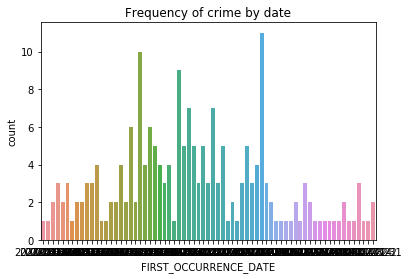

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=crimedata,x='FIRST_OCCURRENCE_DATE')
plt.title('Frequency of crime by date')
plt.show()

**NOW WE CAN SEE THAT MOST CRIMES OCCUR FIRST DURING THE MIDDLE OF EVERY YEAR. 
NOW, IT IS NOT POSSIBLE TO ANALYSE EVERY SINGLE CRIME TYPE TO SEE IN WHICH REGION IT OCCURS. SO LET US JUST ASSESS ONE SINGLE FREQUENT CRIME 'ASSAULT' AND PLOT IT ON THE MAP TO SEE THE REGIONS IT FREQUENTLY OCCURS IN, TO ASSESS OVERALL SAFETY**

In [66]:
data_murder = crimedata[crimedata['PD_DESC']=='ASSAULT']
map_crimedata = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(crimedata['Latitude'], crimedata['Longitude'], data_murder):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_crimedata)  
    
map_crimedata

**AFTER COMPARING THE MAP OF QUEENS AND THE MAP OF ONE CRIME, WE CAN SEE THAT THE OCCURENCE OF CRIME IS MUCH LESSER IN SOUTH AND EAST QUEENS. THE CENTRAL REGION, THE NORTHERN AND THE WESTERN REGIONS OF QUEENS HOWEVER REPORT A HIGHER OCCURENCE OF JUST ONE CRIME ALONE. WE CAN NOW CONCLUDE THAT SOUTHERN AND EASTERN QUEENS ARE MUCH SAFER REGIONS. 
AFTER OBSERVING THE CLUSTER MAP AND THIS ONE, WE CAN MAKE CONCLUSIONS ABOUT WHERE TO SET UP RESTAURANTS TO MINIMISE COMPETITION AND TO PROVIDE A SENSE OF SAFETY TO THE CUSTOMERS TO INCREASE PROFIT**

**THE CONCLUSIONS AND OTHER SIMILAR OBSERVATIONS ABOUT THIS PROJECT CAN BE FOUND IN THE REPORT**